<a href="https://colab.research.google.com/github/MaheepChaudhary/Machine-Learning-Projects/blob/master/Fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install seaborn
!pip install tensorflow==2.0.0-beta1

  Using cached https://files.pythonhosted.org/packages/29/6c/2c9a5c4d095c63c2fb37d20def0e4f92685f7aee9243d6aae25862694fd1/tensorflow-2.0.0b1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [0]:
# importing packages
import tensorflow as tf
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as k


In [0]:
#getting the file
raw = k.utils.get_file("raw","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
raw

'/root/.keras/datasets/raw'

In [0]:
#preparing the pandas dataset
column_names = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin"]
dataset = pd.read_csv(raw, sep = " ",names = column_names, skipinitialspace=True, comment='\t', na_values='?')

In [0]:
#printing last 5 rows
dataset.tail()
dataset.info

<bound method DataFrame.info of       mpg  cylinders  displacement  ...  acceleration  model year  origin
0    18.0          8         307.0  ...          12.0          70       1
1    15.0          8         350.0  ...          11.5          70       1
2    18.0          8         318.0  ...          11.0          70       1
3    16.0          8         304.0  ...          12.0          70       1
4    17.0          8         302.0  ...          10.5          70       1
..    ...        ...           ...  ...           ...         ...     ...
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[398 rows x 8 columns]>

In [0]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [0]:
#removing all rows having na values
dataset = dataset.dropna()
dataset.isna().sum()
dataset.info

<bound method DataFrame.info of       mpg  cylinders  displacement  ...  acceleration  model year  origin
0    18.0          8         307.0  ...          12.0          70       1
1    15.0          8         350.0  ...          11.5          70       1
2    18.0          8         318.0  ...          11.0          70       1
3    16.0          8         304.0  ...          12.0          70       1
4    17.0          8         302.0  ...          10.5          70       1
..    ...        ...           ...  ...           ...         ...     ...
393  27.0          4         140.0  ...          15.6          82       1
394  44.0          4          97.0  ...          24.6          82       2
395  32.0          4         135.0  ...          11.6          82       1
396  28.0          4         120.0  ...          18.6          82       1
397  31.0          4         119.0  ...          19.4          82       1

[392 rows x 8 columns]>

In [0]:
origin = dataset.pop("origin")

In [0]:
#converting origin to one hot encoding and one is multiplied so true false don't come only binary.
dataset["USA"] = (origin == 1)*1.0
dataset["Europe"] = (origin == 2)*1.0
dataset["Japan"] = (origin == 3)*1.0
dataset.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [0]:
#preparing testing and training data
training = dataset.sample(frac=0.8,random_state=0)
testing = dataset.drop(training.index)

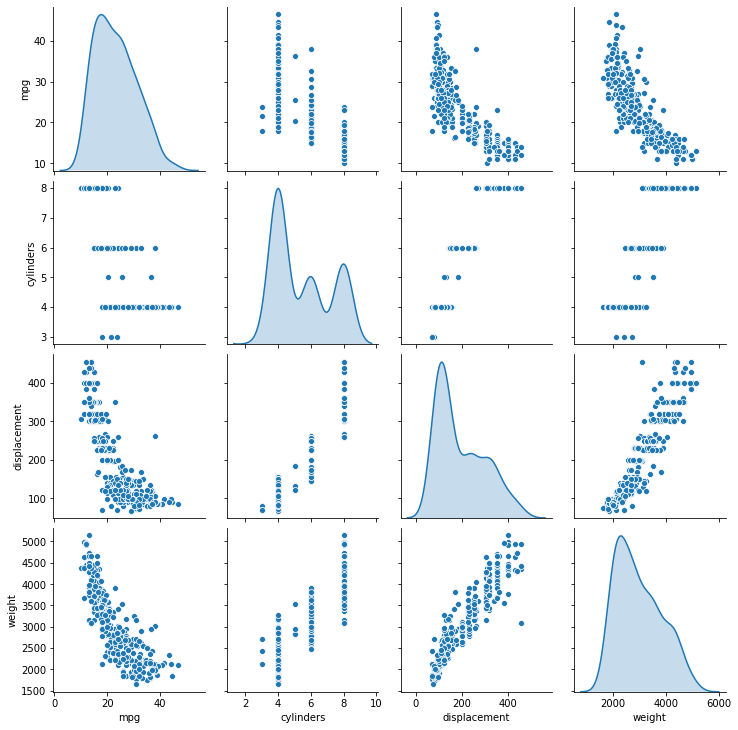

In [0]:
sn.pairplot(training[["mpg","cylinders","displacement","weight"]],diag_kind='kde')

In [0]:
stats = training.describe()
stats.pop("mpg")
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
model year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [0]:
#the labels are in the mpg column hence taken as label
training_label = training.pop("mpg")
testing_label = testing.pop("mpg")

In [0]:
#normalizing the data
def normalize(x):
  return (x-stats["mean"])/stats["std"]
norm_train = normalize(training)
norm_test = normalize(testing)  

In [0]:
#Note:- input_shape hould always be given in square brackets
def build_model(x,y):
  model = k.models.Sequential([
                                k.layers.Dense(64, activation='relu', input_shape = [len(x.keys())]),
                                k.layers.Dense(64, activation='relu'),
                                k.layers.Dense(1)
  ])
  return model
optimizer = k.optimizers.RMSprop()

In [0]:
#compiling the model
#mae me square ni hota but mse me hota hai
model = build_model(training,training_label)
model.summary()
model.compile(optimizer, loss = "mse", metrics = ["mse","mae"])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
#fitting the model
history = model.fit(training, training_label, epochs= 1000, validation_split = 0.2,verbose=0)

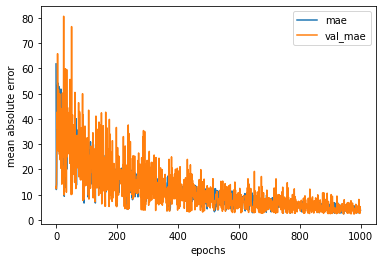

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist["epochs"] = history.epoch
  plt.figure()
  plt.xlabel("epochs")
  plt.ylabel("mean absolute error")
  plt.plot(hist["epochs"],hist["mae"],label = "mae")
  plt.plot(hist["epochs"],hist["val_mae"], label = "val_mae")
  plt.legend()
  plt.show()
plot_history(history)  

In [0]:
model = build_model(training, training_label)

model.compile(optimizer, loss = "mse", metrics = ["mse","mae"])
early_stop = k.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(training,training_label,epochs= 1000,validation_split=0.2,callbacks=[early_stop])

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 0s 2ms/sample - loss: 7817.7233 - mse: 7817.7241 - mae: 38.7733 - val_loss: 102.6982 - val_mse: 102.6982 - val_mae: 8.1013
Epoch 2/1000
251/251 [==============================] - 0s 77us/sample - loss: 139.7240 - mse: 139.7240 - mae: 9.5568 - val_loss: 457.3918 - val_mse: 457.3918 - val_mae: 17.4222
Epoch 3/1000
251/251 [==============================] - 0s 83us/sample - loss: 1978.9662 - mse: 1978.9662 - mae: 37.6078 - val_loss: 4584.5171 - val_mse: 4584.5171 - val_mae: 62.2618
Epoch 4/1000
251/251 [==============================] - 0s 71us/sample - loss: 797.0082 - mse: 797.0081 - mae: 21.0031 - val_loss: 209.1323 - val_mse: 209.1323 - val_mae: 11.6639
Epoch 5/1000
251/251 [==============================] - 0s 69us/sample - loss: 2446.0118 - mse: 2446.0120 - mae: 40.5802 - val_loss: 1924.2460 - val_mse: 1924.2460 - val_mae: 39.0688
Epoch 6/1000
251/251 [==============================]